In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df =pd.read_csv('Test_Data.csv')

In [3]:
pd.set_option('display.max_columns', 999)

In [4]:
df.head()

,Unnamed: 0,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z1,Z2,Z4,Z5,Z6,Class
0,0,6,860.62,809.73,919.69,30.87,69.81,65.24,74.10,2.51,2,6.25,30.15,21.32,38.10,0.56,0.055,20.318,573,505,0.1347,11.8674,88.1326,11.8674,88.1326,0.0704,0.2113,0.001441,0.287743,-3.210000e-07,0.034398,0.036880,-0.000088,0.002757,-0.003582,0.000125,0.001961,-3.290000e-08,0.000346,0.000956,9.150000e-07,1.190000e-07,A
1,1,7,871.58,789.74,929.69,32.82,68.94,64.54,75.97,2.65,5,16.13,37.06,26.21,38.31,0.68,0.012,19.659,849,720,0.1792,15.1943,84.8057,15.1943,84.8057,0.0359,0.2151,0.001733,0.286780,-3.770000e-07,0.035304,0.038578,0.000004,0.002757,-0.002944,0.000131,0.001932,-3.290000e-08,0.000358,0.000888,7.880000e-07,1.280000e-07,A
2,2,6,854.87,789.74,929.69,32.38,70.29,64.54,75.97,2.66,4,12.50,35.65,25.21,38.23,0.66,0.142,21.011,687,622,0.1045,9.4614,90.5386,9.4614,90.5386,0.0354,0.2127,0.002286,0.285158,2.990000e-07,0.032856,0.037614,0.000003,0.003168,-0.002944,0.000125,0.001628,-3.290000e-08,0.000339,0.000875,7.660000e-07,1.150000e-07,A
3,3,7,823.73,759.75,879.71,29.19,72.93,68.20,78.97,2.58,0,0.00,26.89,19.01,36.64,0.52,0.052,20.253,475,409,0.1614,13.8947,86.1053,13.8947,86.1053,0.0694,0.2081,0.001991,0.283580,-1.050000e-07,0.032445,0.036995,-0.000024,0.003168,-0.002490,0.000116,0.001572,-3.290000e-08,0.000308,0.000856,7.330000e-07,9.480000e-08,A
4,4,6,823.44,759.75,879.71,28.98,72.96,68.20,78.97,2.56,0,0.00,28.27,19.99,35.78,0.56,0.092,20.659,424,369,0.1491,12.9717,87.0283,12.9717,87.0283,0.0694,0.2429,0.001699,0.282349,4.950000e-07,0.033050,0.036985,-0.000015,0.003091,-0.002601,0.000126,0.001596,-3.290000e-08,0.000318,0.000913,8.330000e-07,1.010000e-07,A


In [5]:
df.shape

(5839, 43)

In [6]:
df = df.round(decimals=3)

In [7]:
df.describe(include='all')

,Unnamed: 0,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z1,Z2,Z4,Z5,Z6,Class
count,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.0,5839.000000,5839.000000,5839.000000,5839.000000,5839
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1694
mean,2919.000000,9.343895,881.419832,752.025270,1022.796458,64.726520,72.489716,62.020142,86.258733,5.627325,8.537763,30.916857,70.041197,49.526645,74.532927,0.692893,0.243126,7.951272,3171.634184,2075.040932,1.022445,37.681575,62.318425,37.681575,62.318425,0.059287,0.225812,0.032079,0.794159,0.000000,0.031867,0.035365,-0.000001,0.049826,-0.045493,0.001465,0.028792,0.0,0.005093,0.017501,0.004651,0.000431,NaN
std,1685.718442,4.444193,193.896790,189.219045,225.915570,42.044854,18.083747,15.884413,27.521804,5.349168,7.065923,26.549070,54.530884,38.559106,49.191442,0.334191,0.178840,9.265809,5822.432328,4105.579453,1.508573,22.391360,22.391360,22.391360,22.391360,0.027148,0.058503,0.114587,0.842209,0.000019,0.005448,0.005123,0.006343,0.182549,0.192597,0.006367,0.103212,0.0,0.020342,0.066105,0.104313,0.008304,NaN
min,0.000000,4.000000,372.080000,309.900000,419.860000,5.590000,46.150000,37.510000,51.300000,0.900000,0.000000,0.000000,6.170000,4.360000,5.360000,0.100000,0.009000,0.000000,4.000000,1.000000,0.000000,0.000000,4.167000,0.000000,4.167000,0.000000,0.094000,-0.001000,0.071000,-0.001000,0.000000,0.003000,-0.242000,0.001000,-6.287000,0.000000,0.000000,-0.0,0.000000,0.000000,0.000000,0.000000,NaN
25%,1459.500000,7.000000,728.480000,609.800000,859.710000,34.875000,58.005000,50.020000,65.960000,2.870000,2.000000,5.970000,31.590000,22.335000,40.705000,0.450000,0.095000,1.099000,618.500000,355.000000,0.230500,18.729000,45.640500,18.729000,45.640500,0.036000,0.177000,0.001000,0.355000,0.000000,0.031000,0.034000,0.000000,0.002000,-0.027000,0.000000,0.001000,-0.0,0.000000,0.001000,0.000000,0.000000,NaN
50%,2919.000000,8.000000,879.710000,759.750000,1029.660000,57.280000,68.680000,58.270000,78.970000,3.930000,7.000000,24.240000,53.350000,37.720000,62.800000,0.640000,0.208000,1.705000,1490.000000,848.000000,0.531000,34.691000,65.309000,34.691000,65.309000,0.039000,0.217000,0.004000,0.453000,0.000000,0.033000,0.037000,0.000000,0.004000,-0.004000,0.000000,0.002000,-0.0,0.000000,0.001000,0.000000,0.000000,NaN
75%,4378.500000,9.000000,1039.650000,909.700000,1199.600000,81.310000,83.750000,69.790000,98.390000,6.050000,14.000000,54.695000,98.280000,69.490000,92.555000,0.870000,0.358000,20.318000,3574.500000,2500.000000,1.191000,54.359500,81.271000,54.359500,81.271000,0.072000,0.263500,0.021000,0.705000,-0.000000,0.035000,0.038000,0.000000,0.028000,-0.002000,0.001000,0.011000,-0.0,0.002000,0.010000,0.000000,0.000000,NaN


In [8]:
df.columns

Index(['Unnamed: 0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
       'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6',
       'X7', 'X8', 'X9', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9',
       'Z1', 'Z2', 'Z4', 'Z5', 'Z6', 'Class'],
      dtype='object')

In [9]:
df.drop('Unnamed: 0', axis =1, inplace=True)

In [10]:
df.isna().sum()

A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
P        0
Q        0
R        0
X1       0
X2       0
X3       0
X4       0
X5       0
X6       0
X7       0
X8       0
X9       0
Y1       0
Y2       0
Y3       0
Y4       0
Y5       0
Y6       0
Y7       0
Y8       0
Y9       0
Z1       0
Z2       0
Z4       0
Z5       0
Z6       0
Class    0
dtype: int64

In [11]:
# considering "class" column as a target variable

In [12]:
x = df.iloc[:,:-1]
x.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z1,Z2,Z4,Z5,Z6
0,6,860.62,809.73,919.69,30.87,69.81,65.24,74.10,2.51,2,6.25,30.15,21.32,38.10,0.56,0.055,20.318,573,505,0.135,11.867,88.133,11.867,88.133,0.070,0.211,0.001,0.288,-0.0,0.034,0.037,-0.0,0.003,-0.004,0.0,0.002,-0.0,0.0,0.001,0.0,0.0
1,7,871.58,789.74,929.69,32.82,68.94,64.54,75.97,2.65,5,16.13,37.06,26.21,38.31,0.68,0.012,19.659,849,720,0.179,15.194,84.806,15.194,84.806,0.036,0.215,0.002,0.287,-0.0,0.035,0.039,0.0,0.003,-0.003,0.0,0.002,-0.0,0.0,0.001,0.0,0.0
2,6,854.87,789.74,929.69,32.38,70.29,64.54,75.97,2.66,4,12.50,35.65,25.21,38.23,0.66,0.142,21.011,687,622,0.104,9.461,90.539,9.461,90.539,0.035,0.213,0.002,0.285,0.0,0.033,0.038,0.0,0.003,-0.003,0.0,0.002,-0.0,0.0,0.001,0.0,0.0
3,7,823.73,759.75,879.71,29.19,72.93,68.20,78.97,2.58,0,0.00,26.89,19.01,36.64,0.52,0.052,20.253,475,409,0.161,13.895,86.105,13.895,86.105,0.069,0.208,0.002,0.284,-0.0,0.032,0.037,-0.0,0.003,-0.002,0.0,0.002,-0.0,0.0,0.001,0.0,0.0
4,6,823.44,759.75,879.71,28.98,72.96,68.20,78.97,2.56,0,0.00,28.27,19.99,35.78,0.56,0.092,20.659,424,369,0.149,12.972,87.028,12.972,87.028,0.069,0.243,0.002,0.282,0.0,0.033,0.037,-0.0,0.003,-0.003,0.0,0.002,-0.0,0.0,0.001,0.0,0.0


In [13]:
y = df['Class']
y.head()

0    A
1    A
2    A
3    A
4    A
Name: Class, dtype: object

In [14]:
df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8',
       'X9', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Z1', 'Z2',
       'Z4', 'Z5', 'Z6', 'Class'],
      dtype='object')

In [15]:
# plotting significant correlation in one plot(heatmap)
corr = x.corr()

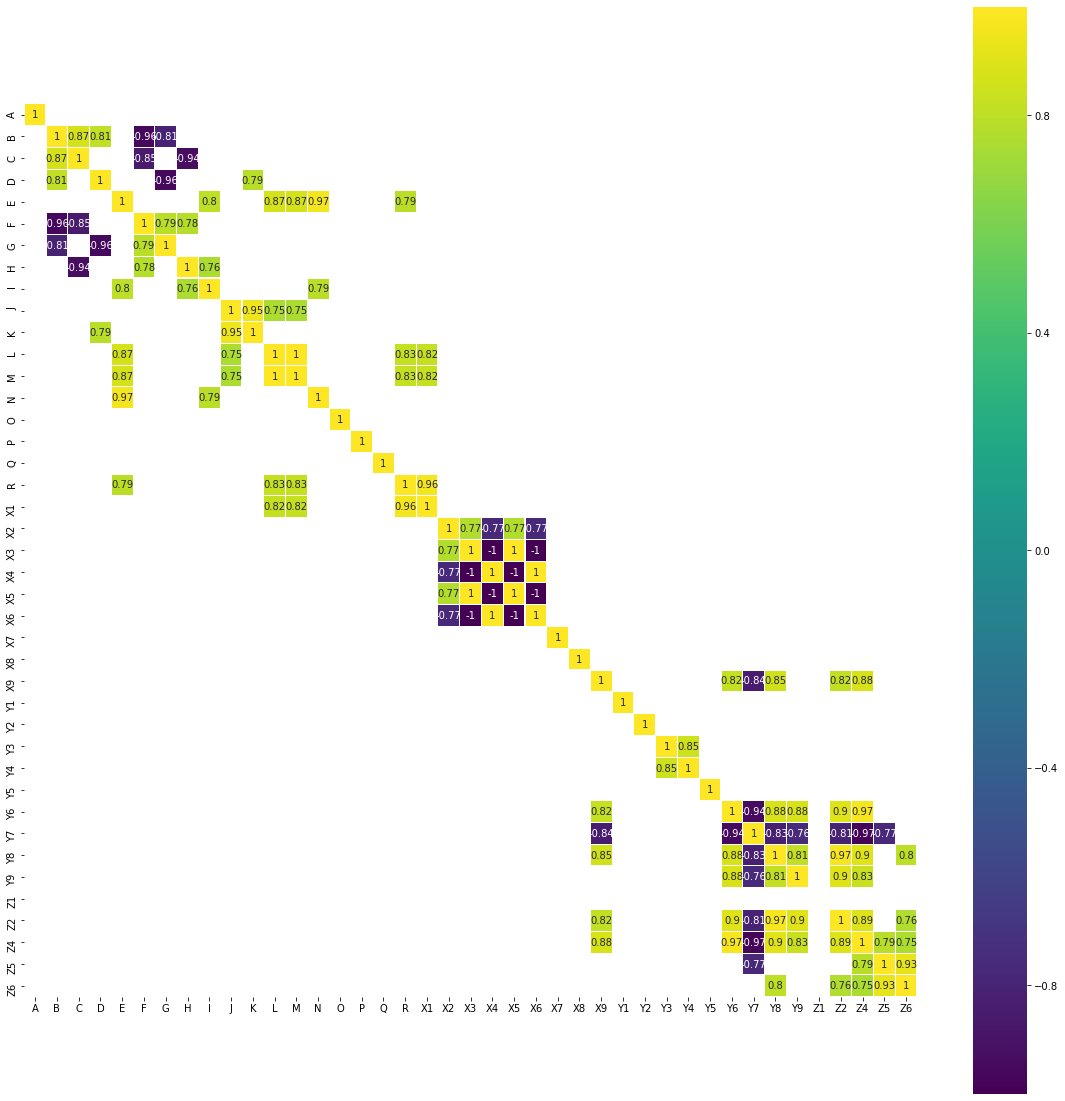

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(corr[(corr>=0.75) | (corr<=-0.75)],
            cmap = "viridis",
            vmax =1.0,vmin = -1.0,
            linewidths = 0.1, annot =True, annot_kws ={'size':10}, square = True);
    

In [17]:
pd.set_option('display.max_rows', 999)
corr = x.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False, na_position="last")


Z6  Z6    1.000000
X9  X9    1.000000
X4  X4    1.000000
    X6    1.000000
X5  X3    1.000000
    X5    1.000000
X6  X4    1.000000
    X6    1.000000
X7  X7    1.000000
X8  X8    1.000000
Y1  Y1    1.000000
Z4  Z4    1.000000
Y2  Y2    1.000000
Y3  Y3    1.000000
Y4  Y4    1.000000
Y5  Y5    1.000000
Y6  Y6    1.000000
Y7  Y7    1.000000
Y8  Y8    1.000000
Y9  Y9    1.000000
X3  X5    1.000000
    X3    1.000000
X2  X2    1.000000
X1  X1    1.000000
B   B     1.000000
C   C     1.000000
D   D     1.000000
E   E     1.000000
F   F     1.000000
G   G     1.000000
H   H     1.000000
I   I     1.000000
J   J     1.000000
K   K     1.000000
L   L     1.000000
M   M     1.000000
N   N     1.000000
O   O     1.000000
P   P     1.000000
Q   Q     1.000000
R   R     1.000000
Z2  Z2    1.000000
A   A     1.000000
Z5  Z5    1.000000
X5  X4    1.000000
X6  X3    1.000000
X3  X6    1.000000
X4  X3    1.000000
    X5    1.000000
X5  X6    1.000000
X3  X4    1.000000
X6  X5    1.000000
M   L     1.

In [18]:
x.drop(['X6','X5','X4','M'],axis = 1, inplace = True)

In [19]:
x.head()

,A,B,C,D,E,F,G,H,I,J,K,L,N,O,P,Q,R,X1,X2,X3,X7,X8,X9,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z1,Z2,Z4,Z5,Z6
0,6,860.62,809.73,919.69,30.87,69.81,65.24,74.10,2.51,2,6.25,30.15,38.10,0.56,0.055,20.318,573,505,0.135,11.867,0.070,0.211,0.001,0.288,-0.0,0.034,0.037,-0.0,0.003,-0.004,0.0,0.002,-0.0,0.0,0.001,0.0,0.0
1,7,871.58,789.74,929.69,32.82,68.94,64.54,75.97,2.65,5,16.13,37.06,38.31,0.68,0.012,19.659,849,720,0.179,15.194,0.036,0.215,0.002,0.287,-0.0,0.035,0.039,0.0,0.003,-0.003,0.0,0.002,-0.0,0.0,0.001,0.0,0.0
2,6,854.87,789.74,929.69,32.38,70.29,64.54,75.97,2.66,4,12.50,35.65,38.23,0.66,0.142,21.011,687,622,0.104,9.461,0.035,0.213,0.002,0.285,0.0,0.033,0.038,0.0,0.003,-0.003,0.0,0.002,-0.0,0.0,0.001,0.0,0.0
3,7,823.73,759.75,879.71,29.19,72.93,68.20,78.97,2.58,0,0.00,26.89,36.64,0.52,0.052,20.253,475,409,0.161,13.895,0.069,0.208,0.002,0.284,-0.0,0.032,0.037,-0.0,0.003,-0.002,0.0,0.002,-0.0,0.0,0.001,0.0,0.0
4,6,823.44,759.75,879.71,28.98,72.96,68.20,78.97,2.56,0,0.00,28.27,35.78,0.56,0.092,20.659,424,369,0.149,12.972,0.069,0.243,0.002,0.282,0.0,0.033,0.037,-0.0,0.003,-0.003,0.0,0.002,-0.0,0.0,0.001,0.0,0.0


In [20]:
pd.set_option('display.max_rows', 999)
corr = x.corr()
corr[corr == 1] = 0
c1 = corr.abs().unstack()
c1.sort_values(ascending = False, na_position="last",)

Z4  Y6    0.973191
Y6  Z4    0.973191
Y8  Z2    0.973141
Z2  Y8    0.973141
Z4  Y7    0.969901
Y7  Z4    0.969901
N   E     0.967564
E   N     0.967564
X1  R     0.961117
R   X1    0.961117
B   F     0.960855
F   B     0.960855
D   G     0.957145
G   D     0.957145
J   K     0.946772
K   J     0.946772
Y7  Y6    0.937779
Y6  Y7    0.937779
H   C     0.935080
C   H     0.935080
Z5  Z6    0.927505
Z6  Z5    0.927505
Y6  Z2    0.901542
Z2  Y6    0.901542
Y8  Z4    0.900246
Z4  Y8    0.900246
Y9  Z2    0.898451
Z2  Y9    0.898451
    Z4    0.893194
Z4  Z2    0.893194
Y6  Y9    0.882416
Y9  Y6    0.882416
X9  Z4    0.882128
Z4  X9    0.882128
Y6  Y8    0.876768
Y8  Y6    0.876768
B   C     0.874247
C   B     0.874247
E   L     0.868362
L   E     0.868362
Y8  X9    0.852865
X9  Y8    0.852865
F   C     0.852736
C   F     0.852736
Y3  Y4    0.845683
Y4  Y3    0.845683
X9  Y7    0.843559
Y7  X9    0.843559
Z4  Y9    0.834190
Y9  Z4    0.834190
R   L     0.826021
L   R     0.826021
Y8  Y7    0.

In [21]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.75 or corr.iloc[i,j] <=- 0.75:
            if columns[j]:
                columns[j] = False
selected_columns = x.columns[columns]
x = x[selected_columns]

In [22]:
x

,A,B,E,J,O,P,Q,X2,X7,X8,X9,Y1,Y2,Y3,Y5,Z1
0,6,860.62,30.87,2,0.56,0.055,20.318,0.135,0.070,0.211,0.001,0.288,-0.0,0.034,-0.000,-0.0
1,7,871.58,32.82,5,0.68,0.012,19.659,0.179,0.036,0.215,0.002,0.287,-0.0,0.035,0.000,-0.0
2,6,854.87,32.38,4,0.66,0.142,21.011,0.104,0.035,0.213,0.002,0.285,0.0,0.033,0.000,-0.0
3,7,823.73,29.19,0,0.52,0.052,20.253,0.161,0.069,0.208,0.002,0.284,-0.0,0.032,-0.000,-0.0
4,6,823.44,28.98,0,0.56,0.092,20.659,0.149,0.069,0.243,0.002,0.282,0.0,0.033,-0.000,-0.0
5,6,825.02,37.81,2,0.60,0.053,20.285,0.300,0.036,0.214,0.002,0.281,-0.0,0.034,-0.000,-0.0
6,10,763.63,126.43,7,0.48,0.449,1.312,1.993,0.036,0.182,0.011,0.298,-0.0,0.033,0.001,-0.0
7,11,792.09,217.95,14,0.92,0.374,0.949,0.437,0.037,0.297,0.045,0.368,0.0,0.029,-0.000,-0.0
8,9,752.25,136.87,10,0.77,0.458,1.170,0.351,0.111,0.185,0.071,0.590,-0.0,0.029,-0.001,-0.0
9,7,659.78,43.39,2,0.39,0.119,1.253,0.339,0.106,0.247,0.076,0.928,-0.0,0.030,0.002,-0.0


In [23]:
pd.set_option('display.max_rows', 999,'display.max_columns', 999)
corr = x.corr()
corr[corr == 1] = 0
c1 = corr.abs().unstack()
c1.sort_values(ascending = False, na_position="last",)

Y2  Y5    0.728062
Y5  Y2    0.728062
E   J     0.638915
J   E     0.638915
P   B     0.602043
B   P     0.602043
J   B     0.554323
B   J     0.554323
Y1  Y3    0.534621
Y3  Y1    0.534621
O   J     0.522166
J   O     0.522166
B   O     0.515758
O   B     0.515758
A   B     0.489141
B   A     0.489141
P   Q     0.463802
Q   P     0.463802
Y1  X9    0.430075
X9  Y1    0.430075
O   X2    0.412887
X2  O     0.412887
X9  Y3    0.407977
Y3  X9    0.407977
A   P     0.382848
P   A     0.382848
O   X8    0.380714
X8  O     0.380714
X2  B     0.347784
B   X2    0.347784
    Q     0.341962
Q   B     0.341962
X2  P     0.310147
P   X2    0.310147
Y1  B     0.296616
B   Y1    0.296616
J   X2    0.292289
X2  J     0.292289
P   J     0.286204
J   P     0.286204
B   Y3    0.285650
Y3  B     0.285650
X9  B     0.270804
B   X9    0.270804
P   O     0.247963
O   P     0.247963
Y2  X9    0.231549
X9  Y2    0.231549
Y1  P     0.223899
P   Y1    0.223899
Y3  P     0.222539
P   Y3    0.222539
B   E     0.

In [24]:
x.shape

(5839, 16)

In [25]:
y.shape

(5839,)

In [26]:
x.drop_duplicates(keep = "first") 

,A,B,E,J,O,P,Q,X2,X7,X8,X9,Y1,Y2,Y3,Y5,Z1
0,6,860.62,30.87,2,0.56,0.055,20.318,0.135,0.070,0.211,0.001,0.288,-0.0,0.034,-0.000,-0.0
1,7,871.58,32.82,5,0.68,0.012,19.659,0.179,0.036,0.215,0.002,0.287,-0.0,0.035,0.000,-0.0
2,6,854.87,32.38,4,0.66,0.142,21.011,0.104,0.035,0.213,0.002,0.285,0.0,0.033,0.000,-0.0
3,7,823.73,29.19,0,0.52,0.052,20.253,0.161,0.069,0.208,0.002,0.284,-0.0,0.032,-0.000,-0.0
4,6,823.44,28.98,0,0.56,0.092,20.659,0.149,0.069,0.243,0.002,0.282,0.0,0.033,-0.000,-0.0
5,6,825.02,37.81,2,0.60,0.053,20.285,0.300,0.036,0.214,0.002,0.281,-0.0,0.034,-0.000,-0.0
6,10,763.63,126.43,7,0.48,0.449,1.312,1.993,0.036,0.182,0.011,0.298,-0.0,0.033,0.001,-0.0
7,11,792.09,217.95,14,0.92,0.374,0.949,0.437,0.037,0.297,0.045,0.368,0.0,0.029,-0.000,-0.0
8,9,752.25,136.87,10,0.77,0.458,1.170,0.351,0.111,0.185,0.071,0.590,-0.0,0.029,-0.001,-0.0
9,7,659.78,43.39,2,0.39,0.119,1.253,0.339,0.106,0.247,0.076,0.928,-0.0,0.030,0.002,-0.0


In [27]:
x.head()

,A,B,E,J,O,P,Q,X2,X7,X8,X9,Y1,Y2,Y3,Y5,Z1
0,6,860.62,30.87,2,0.56,0.055,20.318,0.135,0.070,0.211,0.001,0.288,-0.0,0.034,-0.0,-0.0
1,7,871.58,32.82,5,0.68,0.012,19.659,0.179,0.036,0.215,0.002,0.287,-0.0,0.035,0.0,-0.0
2,6,854.87,32.38,4,0.66,0.142,21.011,0.104,0.035,0.213,0.002,0.285,0.0,0.033,0.0,-0.0
3,7,823.73,29.19,0,0.52,0.052,20.253,0.161,0.069,0.208,0.002,0.284,-0.0,0.032,-0.0,-0.0
4,6,823.44,28.98,0,0.56,0.092,20.659,0.149,0.069,0.243,0.002,0.282,0.0,0.033,-0.0,-0.0


In [28]:
y.head()

0    A
1    A
2    A
3    A
4    A
Name: Class, dtype: object